## Proyect Write a Data Science Blog Post

# Seattle and Boston Airbnb Data

### 1 Business Understanding

Since 2008, Airbnb has been a business of guests and hosts, providing the opportunity to stay in a more exclusive and highly personalized way. However, we are interested in answering the following questions using the CRISP-DM methodology.

1- What is the occupancy rate in Seattle and Boston?


2- What is the occupancy rate in Seattle and Boston by neighborhood?


3- What is the average price per night in Seattle and Boston?


4- What is the average price per week?


5- What are the most expensive and cheapest times of the year in Seattle and Boston?


6- What are the prices for one night per neighborhood?


7- What are the busiest times of the year in Seattle and Boston?


8- Do the two cities have differences in terms of times of the year or prices?


9- In the busiest times do prices go up?


10- Is there currently an upward trend in terms of lodging and their prices?


11- Could you predict the price for new hosting with current features?


### 2 - Data Comprehension

### Data collection 

#### Importing the necessary libraries and files:

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline


#Loading the data
df_CB = pd.read_csv('./calendar_Boston.csv')
df_CS = pd.read_csv('./calendar_Seattle.csv')
df_LB = pd.read_csv('./listings_Boston.csv')
df_LS = pd.read_csv('./listings_Seattle.csv')
df_RB = pd.read_csv('./reviews_Boston.csv')
df_RS = pd.read_csv('./reviews_Seattle.csv')

### Data evaluation

#### Observing uploaded files

Exploring the data sets:

-Number of rows and columns in the files.

-Missing values.

-Description of the fields.


In [2]:
#First rows of tables
df_CB.head(1)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN


In [3]:
#First rows of tables
df_CS.head(1)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00


In [4]:
#First rows of tables
df_LB.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [5]:
#First rows of tables
df_LS.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [6]:
#First rows of tables
df_RB.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...


In [7]:
#First rows of tables
df_RS.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


#### Checking file dimensions

In [8]:
#Checking table sizes
print(df_CB.shape)
print(df_CS.shape)
print(df_LB.shape)
print(df_LS.shape)
print(df_RB.shape)
print(df_RS.shape)

(1308890, 4)
(1393570, 4)
(3585, 95)
(3818, 92)
(68275, 6)
(84849, 6)


#### Reviewing column names and data types

In [9]:
# Checking data types
print(df_CB.dtypes.value_counts())
print(df_CS.dtypes.value_counts())
print(df_LB.dtypes.value_counts())
print(df_LS.dtypes.value_counts())
print(df_RB.dtypes.value_counts())
print(df_RS.dtypes.value_counts())

object    3
int64     1
dtype: int64
object    3
int64     1
dtype: int64
object     62
float64    18
int64      15
dtype: int64
object     62
float64    17
int64      13
dtype: int64
int64     3
object    3
dtype: int64
int64     3
object    3
dtype: int64


#### Describing column names and data types

In [10]:
# Checking data types
print(df_LS.dtypes[df_LS.dtypes=='object'])
print(df_LB.dtypes[df_LB.dtypes=='object'])

print(df_LS.dtypes[df_LS.dtypes=='int64'])
print(df_LB.dtypes[df_LB.dtypes=='int64'])

print(df_LS.dtypes[df_LS.dtypes=='float64'])
print(df_LB.dtypes[df_LB.dtypes=='float64'])

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_response_rate                  object
host_acceptance_rate                object
host_is_superhost                   object
host_thumbn

#### Checking for missing values

In [11]:
#Checking for null values
print(df_LS.isnull().sum().sort_values(ascending=False)/df_LS.shape[0]*100)
print(df_LB.isnull().sum().sort_values(ascending=False)/df_LB.shape[0]*100)

license                             100.000000
square_feet                          97.459403
monthly_price                        60.267156
security_deposit                     51.126244
weekly_price                         47.380828
notes                                42.063908
neighborhood_overview                27.029859
cleaning_fee                         26.977475
transit                              24.463070
host_about                           22.498690
host_acceptance_rate                 20.246202
review_scores_accuracy               17.234154
review_scores_checkin                17.234154
review_scores_value                  17.181771
review_scores_location               17.155579
review_scores_cleanliness            17.103195
review_scores_communication          17.050812
review_scores_rating                 16.946045
reviews_per_month                    16.422211
first_review                         16.422211
last_review                          16.422211
space        

### 3 Prepare data

### data dispute

### Data cleaning

In [12]:
#Creating the lists to better appreciate the days of the weeks and months


week_list=['Monday','Tueday','Wedday','Thuday','Friday','Satday','Sunday']
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Let's remove the columns from  jurisdiction_names,license,has_availability,square_feet since the percentage of completeness is very low and weekly_price and monthly_price we already have them in price.


In [13]:
#Removing columns that are not relevant at the moment
df_LS.drop(['jurisdiction_names','license','has_availability','square_feet','weekly_price','monthly_price'], axis=1)
df_LB.drop(['jurisdiction_names','license','has_availability','square_feet','weekly_price','monthly_price'], axis=1)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,9.0,10.0,f,f,flexible,f,f,1,1.70
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,10.0,9.0,9.0,f,f,strict,f,f,3,4.00
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,10.0,10.0,10.0,f,f,moderate,t,t,2,2.38
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,10.0,9.0,10.0,f,f,moderate,f,f,1,5.36
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,10.0,9.0,9.0,f,f,strict,f,f,2,1.01


#### Cleaning of the fields related to prices

In [14]:
#All fields related to prices, we will clean the currency signs, remove the commas and convert the data to float

df_LS['price'] = df_LS['price'].str.replace('$', '')
df_LB['price'] = df_LB['price'].str.replace('$', '')
df_LS['price'] = df_LS['price'].str.replace(',', '')
df_LB['price'] = df_LB['price'].str.replace(',', '')
df_LS['price'].fillna(0, inplace=True)
df_LB['price'].fillna(0, inplace=True)
df_LS['price'] = df_LS['price'].astype(float)
df_LB['price'] = df_LB['price'].astype(float)


df_LS['security_deposit'] = df_LS['security_deposit'].str.replace('$', '')
df_LB['security_deposit'] = df_LB['security_deposit'].str.replace('$', '')
df_LS['security_deposit'] = df_LS['security_deposit'].str.replace(',', '')
df_LB['security_deposit'] = df_LB['security_deposit'].str.replace(',', '')
df_LS['security_deposit'].fillna(0, inplace=True)
df_LB['security_deposit'].fillna(0, inplace=True)
df_LS['security_deposit'] = df_LS['security_deposit'].astype(float)
df_LB['security_deposit'] = df_LB['security_deposit'].astype(float)




df_LS['cleaning_fee'] = df_LS['cleaning_fee'].str.replace('$', '')
df_LB['cleaning_fee'] = df_LB['cleaning_fee'].str.replace('$', '')
df_LS['cleaning_fee'] = df_LS['cleaning_fee'].str.replace(',', '') 
df_LB['cleaning_fee'] = df_LB['cleaning_fee'].str.replace(',', '')
df_LS['cleaning_fee'].fillna(0, inplace=True)                          
df_LB['cleaning_fee'].fillna(0, inplace=True)
df_LS['cleaning_fee'] = df_LS['cleaning_fee'].astype(float)
df_LB['cleaning_fee'] = df_LB['cleaning_fee'].astype(float)
    
                              
df_LS['extra_people'] = df_LS['extra_people'].str.replace('$', '')
df_LB['extra_people'] = df_LB['extra_people'].str.replace('$', '')
df_LS['extra_people'] = df_LS['extra_people'].str.replace(',', '')
df_LB['extra_people'] = df_LB['extra_people'].str.replace(',', '')
df_LS['extra_people'].fillna(0, inplace=True) 
df_LB['extra_people'].fillna(0, inplace=True)
df_LS['extra_people'] = df_LS['extra_people'].astype(float)
df_LB['extra_people'] = df_LB['extra_people'].astype(float)

df_LS['host_response_rate'] = df_LS['host_response_rate'].str.replace('%', '')
df_LB['host_response_rate'] = df_LB['host_response_rate'].str.replace('%', '')
df_LS['host_response_rate'] = df_LS['host_response_rate'].str.replace(',', '')
df_LB['host_response_rate'] = df_LB['host_response_rate'].str.replace(',', '')
df_LS['host_response_rate'].fillna(0, inplace=True) 
df_LB['host_response_rate'].fillna(0, inplace=True)
df_LS['host_response_rate'] = df_LS['host_response_rate'].astype(float)
df_LB['host_response_rate'] = df_LB['host_response_rate'].astype(float)


df_LS['host_acceptance_rate'] = df_LS['host_acceptance_rate'].str.replace('%', '')
df_LB['host_acceptance_rate'] = df_LB['host_acceptance_rate'].str.replace('%', '')
df_LS['host_acceptance_rate'] = df_LS['host_acceptance_rate'].str.replace(',', '')
df_LB['host_acceptance_rate'] = df_LB['host_acceptance_rate'].str.replace(',', '')
df_LS['host_acceptance_rate'].fillna(0, inplace=True) 
df_LB['host_acceptance_rate'].fillna(0, inplace=True)
df_LS['host_acceptance_rate'] = df_LS['host_acceptance_rate'].astype(float)
df_LB['host_acceptance_rate'] = df_LB['host_acceptance_rate'].astype(float)


df_CS['price'] = df_CS['price'].str.replace('$', '')
df_CB['price'] = df_CB['price'].str.replace('$', '')
df_CS['price'] = df_CS['price'].str.replace(',', '')
df_CB['price'] = df_CB['price'].str.replace(',', '')
df_CS['price'] = df_CS['price'].astype(float)
df_CB['price'] = df_CB['price'].astype(float)


#fill null values

num_vars=df_CS[['price']]
drop_pric_df_CS=num_vars.dropna(subset=['price'], axis=0)
fill_mean = lambda col:col.fillna(col.mean())
fill_df_CS= drop_pric_df_CS.apply(fill_mean,axis=0)


num_vars=df_CB[['price']]
drop_pric_df_CB=num_vars.dropna(subset=['price'], axis=0)
fill_mean = lambda col:col.fillna(col.mean())
fill_df_CB= drop_pric_df_CB.apply(fill_mean,axis=0)


In [15]:
# converting the data to booleans
df_CS['available'] = df_CS['available'] == 't'
df_CB['available'] = df_CB['available'] == 't'

In [16]:
# converting the data to dates
df_CS['date'] =  pd.to_datetime(df_CS['date'])
df_CB['date'] =  pd.to_datetime(df_CB['date'])

In [17]:
#Joining the databases


list_LS= df_LS[['id' ,'neighbourhood_group_cleansed']] 
list_LB= df_LB[['id' ,'neighbourhood_group_cleansed']] 

list_LS2 = list_LS.rename(index=str, columns={"id": "listing_id", "neighbourhood_group_cleansed":"neighbourhood"})
list_LB2 = list_LB.rename(index=str, columns={"id": "listing_id", "neighbourhood_group_cleansed":"neighbourhood"})

completed_df_S=pd.merge(df_CS, list_LS2, on=['listing_id', 'listing_id'])
completed_df_B=pd.merge(df_CB, list_LB2, on=['listing_id', 'listing_id'])


#Changing the data to categorical
completed_df_S['neighbourhood'] = completed_df_S['neighbourhood'].astype('category')
completed_df_B['neighbourhood'] = completed_df_B['neighbourhood'].astype('category')


### Exploratory data analysis

In [18]:
# The total sum of income in each of the cities

revenue_total_Seattle= df_CS['price'].sum()
revenue_total_Boston =df_CB['price'].sum()
print(revenue_total_Seattle)
print(revenue_total_Boston)

128915264.0
127603561.0


We have very similar incomes in the two cities.

In [19]:
#Price for each night in each of the cities

price_total_Seattle= df_CS['price'].mean().mean()
price_total_Boston =df_CB['price'].mean().mean()
print(price_total_Seattle)
print(price_total_Boston)

137.944858551
198.438909425


However, Boston is more expensive per night than Seattle per night

In [20]:
#Percentage of occupation by city per year
occupancy_total_Seattle= df_CS['available'].mean()*100
occupancy_total_Boston =df_CB['available'].mean()*100
print(occupancy_total_Seattle)
print(occupancy_total_Boston)

67.0610016002
49.1284217925


We have higher occupancy in Seattle than is Boston.

1- What is the monthly occupancy rate in Seattle and Boston?

In [21]:
#Percent occupancy per week in Seattle
ocu_month_S = completed_df_S.groupby(completed_df_S['date'].dt.strftime('%m'))['available'].mean()*100
ocu_month_S = pd.DataFrame(ocu_month_S).reset_index()
ocu_month_S['date'] = ocu_month_S.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
print(ocu_month_S)

#Percent occupancy per week in Boston
ocu_month_B = completed_df_B.groupby(completed_df_B['date'].dt.strftime('%m'))['available'].mean()*100
ocu_month_B = pd.DataFrame(ocu_month_B).reset_index()
ocu_month_B['date'] = ocu_month_B.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
print(ocu_month_B)


   date  available
0   Jan  56.693731
1   Feb  66.220805
2   Mar  70.918738
3   Apr  66.384669
4   May  67.567042
5   Jun  67.438449
6   Jul  62.709745
7   Aug  64.505145
8   Sep  67.440196
9   Oct  69.651397
10  Nov  71.398638
11  Dec  73.557343
   date  available
0   Jan  56.834824
1   Feb  56.579157
2   Mar  49.638379
3   Apr  47.761666
4   May  48.216181
5   Jun  49.015616
6   Jul  49.442276
7   Aug  49.980210
8   Sep  31.044804
9   Oct  41.689905
10  Nov  54.738799
11  Dec  54.870194


2- What is the occupancy rate in Seattle and Boston by neighborhood?

In [22]:
#Percentage of occupancy by neighborhood en Seattle
ocu_neighbourhood_S = completed_df_S.groupby(completed_df_S['neighbourhood'])['available'].mean()*100
ocu_neighbourhood_S = pd.DataFrame(ocu_neighbourhood_S).reset_index()
print(ocu_neighbourhood_S)

          neighbourhood  available
0               Ballard  69.225730
1           Beacon Hill  70.280938
2          Capitol Hill  64.104757
3               Cascade  57.617362
4          Central Area  67.235401
5              Delridge  74.718224
6              Downtown  64.990954
7              Interbay  84.533001
8             Lake City  76.879984
9              Magnolia  77.466876
10            Northgate  72.277397
11  Other neighborhoods  67.168490
12           Queen Anne  62.042257
13       Rainier Valley  67.052641
14          Seward Park  68.001245
15  University District  74.439704
16         West Seattle  70.112693


In [23]:
#Percentage of occupancy by neighborhood en Boston
ocu_neighbourhood_B = completed_df_B.groupby(completed_df_B['neighbourhood'])['available'].mean()*100
ocu_neighbourhood_B = pd.DataFrame(ocu_neighbourhood_B).reset_index()
print(ocu_neighbourhood_B)

Empty DataFrame
Columns: [neighbourhood, available]
Index: []


3- What is the average price per night in Seattle and Boston?

In [24]:
# average price by night Seattle
pdays = completed_df_S.groupby(completed_df_S['date'].dt.strftime('%w'))['price'].mean()
pdays = pd.DataFrame(pdays).reset_index()
pdays['date'] = pdays['date'].replace(['0','1','2','3','4','5','6'], week_list)
print(pdays)


     date       price
0  Monday  136.459941
1  Tueday  135.676414
2  Wedday  135.408764
3  Thuday  135.447880
4  Friday  136.476032
5  Satday  143.036294
6  Sunday  143.202136


In [25]:
# average price by night Boston
pdayb = completed_df_B.groupby(completed_df_B['date'].dt.strftime('%w'))['price'].mean()
pdayb = pd.DataFrame(pdayb).reset_index()
pdayb['date'] = pdayb['date'].replace(['0','1','2','3','4','5','6'], week_list)
print(pdayb)

     date       price
0  Monday  198.219764
1  Tueday  195.809561
2  Wedday  195.173842
3  Thuday  195.418228
4  Friday  198.073112
5  Satday  203.121167
6  Sunday  203.408387


4- What is the average price per week?

In [26]:
# average price by night week in Seattle
p_weekly_S = completed_df_S.groupby(completed_df_S['date'].dt.strftime('%W'))['price'].mean().mean()*7
p_weekly_S

965.64266100310931

In [27]:
# average price by night week in Boston
p_weekly_B = completed_df_B.groupby(completed_df_B['date'].dt.strftime('%W'))['price'].mean().mean()*7
p_weekly_B

1404.5887287777041

5- What are the most expensive and cheapest times of the year in Seattle and Boston?

In [28]:
#average price by month Seattle
df_CS['year'] = pd.DatetimeIndex(df_CS['date']).year
df_CS['month'] = pd.DatetimeIndex(df_CS['date']).month
aps=df_CS.groupby(['year','month'])[['price']].mean()
print(aps)

#average price by month Boston
df_CB['year'] = pd.DatetimeIndex(df_CB['date']).year
df_CB['month'] = pd.DatetimeIndex(df_CB['date']).month
apb=df_CB.groupby(['year','month'])[['price']].mean()
print(apb)

                 price
year month            
2016 1      121.568409
     2      124.293927
     3      128.644488
     4      135.097005
     5      139.538183
     6      147.473137
     7      152.094150
     8      150.656594
     9      143.255949
     10     137.031939
     11     135.688738
     12     137.251835
2017 1      136.882590
                 price
year month            
2016 9      252.677308
     10     233.416248
     11     202.924416
     12     192.601915
2017 1      182.799671
     2      180.961028
     3      181.818742
     4      197.252890
     5      193.712295
     6      196.535302
     7      202.486309
     8      203.330142
     9      194.658331


# findings
- We can see that the most expensive times to visit Seattle are June and August, however for Boston it is the month of September. We observed a certain relationship with the vacation periods of most of the students.

- With respect to the cheapest times to travel to Seattle as well as to Boston, they are in the months of January, sure with a lot of cold in winter.

6- What are the prices for one night per neighborhood?

In [29]:
# Average price by night by neighbourhood
apns=completed_df_S.groupby('neighbourhood')[['price']].mean()
print(apns)

                          price
neighbourhood                  
Ballard              125.905980
Beacon Hill          100.668781
Capitol Hill         134.671895
Cascade              154.033178
Central Area         134.883729
Delridge              90.926944
Downtown             187.343042
Interbay             118.421037
Lake City             94.518589
Magnolia             198.694341
Northgate             93.455532
Other neighborhoods  125.622015
Queen Anne           176.117882
Rainier Valley       100.104924
Seward Park          111.110338
University District  104.709937
West Seattle         148.155804


In [30]:
# Average price by night by neighbourhood
apnb=completed_df_B.groupby('neighbourhood')[['price']].mean()
print(apnb)

Empty DataFrame
Columns: [price]
Index: []


7- What are the busiest times of the year in Seattle and Boston?

In [31]:
# visits by month Seattle
df_CS['year'] = pd.DatetimeIndex(df_CS['date']).year
df_CS['month'] = pd.DatetimeIndex(df_CS['date']).month
vms= df_CS.groupby('year')['month'].value_counts()
print(vms)

year  month
2016  3        118358
      5        118358
      7        118358
      8        118358
      10       118358
      12       118358
      4        114540
      6        114540
      9        114540
      11       114540
      2        110722
      1        106904
2017  1          7636
Name: month, dtype: int64


In [32]:
# visits by month Boston
df_CB['year'] = pd.DatetimeIndex(df_CB['date']).year
df_CB['month'] = pd.DatetimeIndex(df_CB['date']).month
vmb= df_CB.groupby('year')['month'].value_counts()
print(vmb)

year  month
2016  10       111166
      12       111166
      11       107580
      9         89650
2017  1        111166
      3        111166
      5        111166
      7        111166
      8        111166
      4        107580
      6        107580
      2        100408
      9         17930
Name: month, dtype: int64


# findings

- The least number of visits in is in January of each year, however, it is necessary to review the number of visits in January 2017, since it is significantly less.
- For Boston, the least number of visits is in September, which coincides with the most expensive time to stay in Boston.

8- Do the two cities have differences in terms of times of the year or prices?

- The two cities coincide with the cheapest prices to travel, but not in the most expensive prices, nor in the months of less or more occupation.

9- In the busiest times do prices go up?

- No, apparently there is no relationship between the most expensive prices and the busiest times in the two cities.

10- Is there currently an upward trend in terms of lodging and their prices?

- We do not observe that there is an increase in prices or visits, for the most recent months.

In [33]:
#Seattle

def PlotS(df,x,y,ylim,title,xlabel,ylabel,meanline,xticklabel):
    f, ax = plt.subplots(figsize=(8,5))
    
    """
    Summary:
    The PlotS function parameterizes all the attributes of the graphs.
         
    The horizontal line within the graphs to represent the mean of the data and.
         
    If x is the neighborhoods, uses their name labels.
    
    Parameters:
    
    df, x,y,ylim, title,xlabel,ylabel, meanline and xticklabel
    
    Return:
    Seattle graphics
         
    """
    

    sns.barplot(x,y,data=df,color='mediumaquamarine')
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.ylim(0,ylim)
    plt.xticks(rotation=90)
    plt.title(title,fontsize=20)
    plt.axhline(df_CS[meanline].mean()*100,color='r',label='Avg for Year')
    plt.legend();
    
    
    if meanline == 'price': 
        plt.axhline(df_CS[meanline].mean(),color='r')
    else:
        plt.axhline(df_CS[meanline].mean()*100,color='b')
    plt.legend();
    
    if(xticklabel):
        ax.set_xticklabels(ocu_neighbourhood_S[['neighbourhood']], rotation = 90,fontsize=12)   
 
    ttl = ax.title
    ttl.set_position([.5, 1.05])
    plt.show()
    
    

    #BOSTON

def PlotB(df,x,y,ylim,title,xlabel,ylabel,meanline,xticklabel):
    f, ax = plt.subplots(figsize=(8,5))
    
    """
    Summary:
    The PlotB function parameterizes all the attributes of the graphs.
         
    The horizontal line within the graphs to represent the mean of the data and.
         
    If x is the neighborhoods, uses their name labels.
    
    Parameters:
    
    df, x,y,ylim, title,xlabel,ylabel, meanline and xticklabel
    
    Return:
    Boston graphics
         
    """
    sns.barplot(x,y,data=df,color='mediumaquamarine')
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.ylim(0,ylim)
    plt.xticks(rotation=90)
    plt.title(title,fontsize=20)
    plt.axhline(df_CS[meanline].mean()*100,color='r',label='Avg for Year')
    plt.legend();
    
    
    if meanline == 'price': 
        plt.axhline(df_CS[meanline].mean(),color='r')
    else:
        plt.axhline(df_CS[meanline].mean()*100,color='b')
    plt.legend();
    
    if(xticklabel):
        ax.set_xticklabel(ocu_neighbourhood_S[['neighbourhood']], rotation = 90,fontsize=12)   
 
    ttl = ax.title
    ttl.set_position([.5, 1.05])
    plt.show()
    

# 5 Evaluate the results

# Views

### 1- What is the occupancy rate in Seattle and Boston?

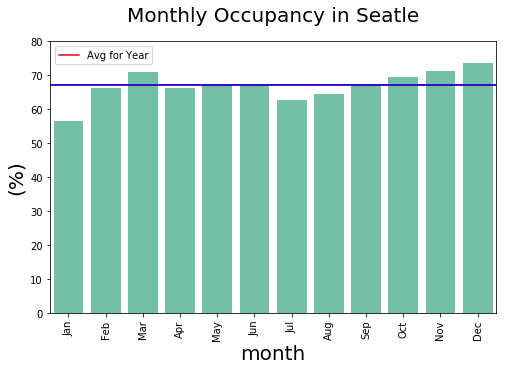

In [34]:
#Creating the occupancy graph in Seattle
[PlotS(ocu_month_S,"date","available",80,
        xlabel="month",
        ylabel="(%)",          
       title="Monthly Occupancy in Seatle",
     xticklabel=False,
    
             meanline = "available")];

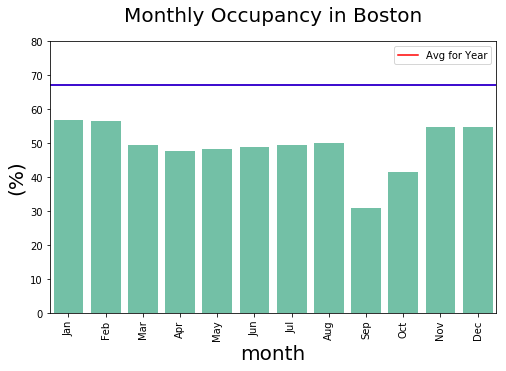

In [35]:
#Creating the occupancy graph in Boston
[PlotB(ocu_month_B,"date","available",80,
            xlabel="month",
             ylabel="(%)",
             title="Monthly Occupancy in Boston",
       xticklabel=False,
             meanline = "available")];

### 2- What is the occupancy rate in Seattle and Boston by neighborhood?

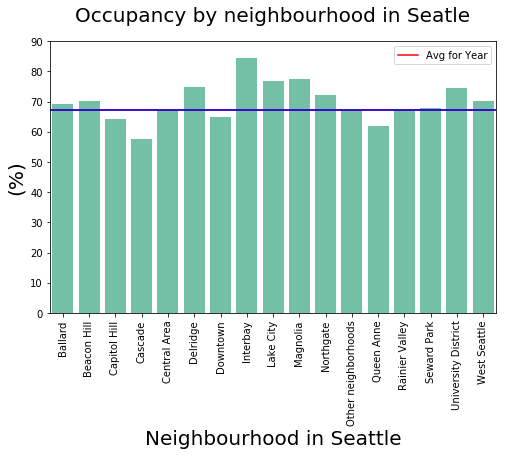

In [36]:

#Creating the occupancy by neighborhood graph in Seatle
[PlotS(ocu_neighbourhood_S, "neighbourhood" , "available" , 90 , 
            xlabel = "Neighbourhood in Seattle" , 
             ylabel = "(%)",
             title = "Occupancy by neighbourhood in Seatle", 
             meanline  =  "available" , 
             xticklabel = False)];

In [37]:
#We dont have data for the occupancy by neighborhood graph in Bonton

### 3- What is the average price per night in Seattle and Boston?

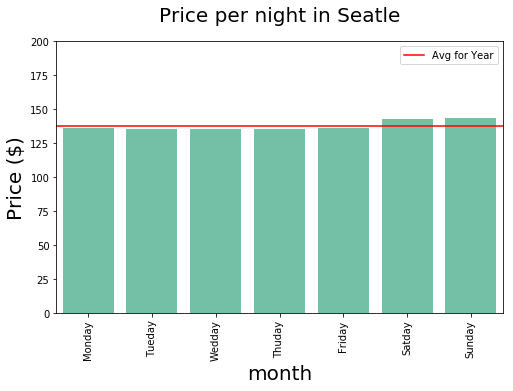

In [38]:
#Creating the price graph in Seatle
[PlotS(pdays,"date","price",200,
             xlabel="month",
             ylabel="Price ($)",
            title="Price per night in Seatle",
       xticklabel=False,
             meanline = "price")];

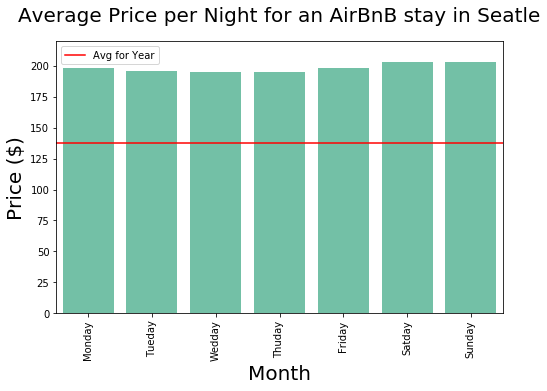

In [39]:
#Creating the price graph in Boston
[PlotB(pdayb,"date","price",220,
             title="Average Price per Night for an AirBnB stay in Seatle",
             xlabel="Month",
             ylabel="Price ($)",
       xticklabel=False,
             meanline = "price")];

### 5- What are the most expensive and cheapest times of the year in Seattle and Boston?

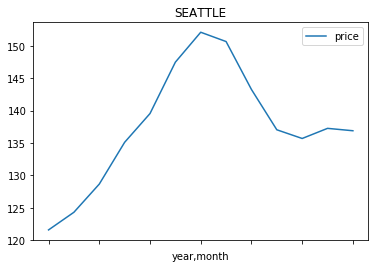

In [40]:
#Creating the monthly price graph in Seattle
from matplotlib import pyplot as plt
df_CS['year'] = pd.DatetimeIndex(df_CS['date']).year
df_CS['month'] = pd.DatetimeIndex(df_CS['date']).month
df_CS.groupby(['year','month'])[['price']].mean().plot( kind='line',title="SEATTLE");

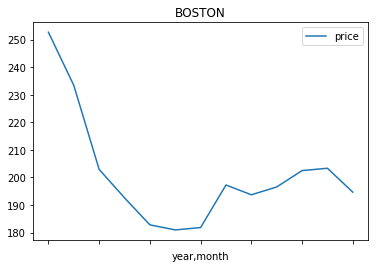

In [41]:
#Creating the monthly price graph in Boston

df_CB['year'] = pd.DatetimeIndex(df_CB['date']).year
df_CB['month'] = pd.DatetimeIndex(df_CB['date']).month
df_CB.groupby(['year','month'])[['price']].mean().plot(kind='line',title="BOSTON");

### 7-What are the busiest times of the year in Seattle and Boston?

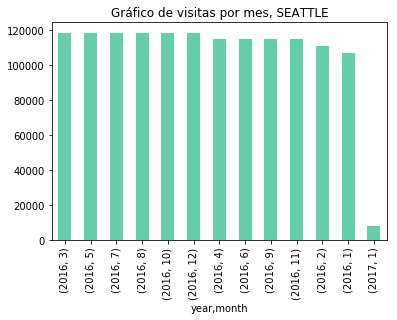

In [42]:
#Creating the monthly occupancy graph in Seattle
df_CS['year'] = pd.DatetimeIndex(df_CS['date']).year
df_CS['month'] = pd.DatetimeIndex(df_CS['date']).month

df_CS.groupby('year')['month'].value_counts().plot(kind="bar", title="Gráfico de visitas por mes, SEATTLE",color='mediumaquamarine');


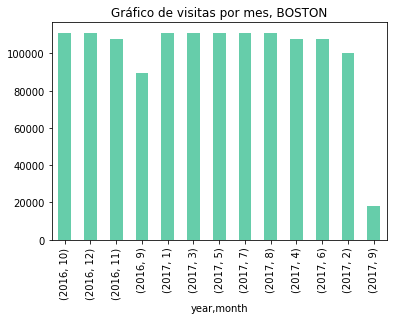

In [43]:
#Creating the monthly occupancy graph in Boston
df_CB['year'] = pd.DatetimeIndex(df_CB['date']).year
df_CB['month'] = pd.DatetimeIndex(df_CB['date']).month

df_CB.groupby('year')['month'].value_counts().plot(kind="bar", title="Gráfico de visitas por mes, BOSTON",color='mediumaquamarine');

### 11- Could you predict the price for new hosting with current features?

Predicciones para Seattle

In [44]:
# Selected some predictor variables

df_S = df_LS[['bathrooms', 'bedrooms', 'beds','latitude', 'longitude', 'reviews_per_month',
        'accommodates', 'guests_included', 'host_is_superhost', 'neighbourhood_group_cleansed',
        'property_type','room_type','bed_type','price','security_deposit',
        'cleaning_fee', 'extra_people', 'instant_bookable', 'cancellation_policy']]

In [45]:
# Checking columns with null values
df_S.isnull().sum()[df_S.isnull().sum()>0]

bathrooms             16
bedrooms               6
beds                   1
reviews_per_month    627
host_is_superhost      2
property_type          1
dtype: int64

In [46]:
#For the empty cells of numerical data, we will make the substitution by the mean:

'''Since there are few null values, it will not significantly affect the model results, 
however for columns with more than 50% null values, it is best to remove the column and review the model results.'''

df_S['bathrooms'].fillna(df_S['bathrooms'].mean(), inplace=True)
df_S['bedrooms'].fillna(df_S['bedrooms'].mean(), inplace=True)
df_S['beds'].fillna(df_S['beds'].mean(), inplace=True)
df_S['reviews_per_month'].fillna(df_S['reviews_per_month'].mean(), inplace=True)


#For the empty cells for categorical data with the mode:

df_S [ 'host_is_superhost' ] . fillna ( df_S [ 'host_is_superhost' ] . mode ()[ 0 ],  inplace = True ) 
df_S [ 'property_type' ] . fillna ( df_S [ 'property_type' ] . mode ()[ 0 ],  inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [47]:
# Checking data types
df_S.dtypes

bathrooms                       float64
bedrooms                        float64
beds                            float64
latitude                        float64
longitude                       float64
reviews_per_month               float64
accommodates                      int64
guests_included                   int64
host_is_superhost                object
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
bed_type                         object
price                           float64
security_deposit                float64
cleaning_fee                    float64
extra_people                    float64
instant_bookable                 object
cancellation_policy              object
dtype: object

In [48]:
#Selected the categorical variables
cat_cols = df_S.select_dtypes(include=['object'])

#Function to transform dummies variables
for col in cat_cols:
    try:
        df_S = pd.concat([df_S.drop(col, axis=1), pd.get_dummies(df_S[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    except:
        continue
#We select what will be our predictor variables and the dependent variable
y = df_S['price']
X = df_S.drop(columns='price') 

# We select 70% of the data to train and 30% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=32)

In [49]:
#First we will see how we do with a linear regression model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.541991649078


In [50]:

# We will try to use a regression model with Random Forest, and see if our r2 improves.
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
import multiprocessing

X_train, X_test, y_train, y_test = train_test_split(
                                        df_S.drop(columns = "price"),
                                        df_S['price'],
                                        random_state = 96
                                    )

modelo = RandomForestRegressor(n_estimators = 9,criterion    = 'mse', max_depth    = None,max_features = 'auto',oob_score    = False,
            n_jobs       = -1,random_state = 96
         )
modelo.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=-1,
           oob_score=False, random_state=96, verbose=0, warm_start=False)

Model prediction and evaluation

In [51]:
#Checking the regression results with Random Forest
y_test_preds = modelo.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.533904018728


We see better results with Random Forest than with linear regression, the highest result is an explanation of 56% of the dependent variable (price) with the other predictor variables such as 'bathrooms', 'bedrooms', 'beds', 'latitude ', 'longitude', 'reviews_per_month', 'accommodates', 'guests_included', 'host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'extra_people', 'instant_bookable', 'cancellation_policy' and it is a very good start, taking into account that in real life it is quite difficult to obtain determination coefficients greater than 50%, however, more variables can be extracted from the texts and the model performance.